In [9]:
setwd("D:/Workspace/Rdata")

In [10]:
data = read.csv('flushot.csv')
head(data)

flushot,age,aware,gender
0,59,52,0
0,61,55,1
1,82,51,0
0,51,70,0
0,53,70,0
0,62,49,1


In [11]:
log_model=glm(flushot~.,data=data,family = binomial(logit))
summary(log_model)
# gender 독립적, 유효하지 않은 설명변수


Call:
glm(formula = flushot ~ ., family = binomial(logit), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4037  -0.5637  -0.3352  -0.1542   2.9394  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.17716    2.98242  -0.395  0.69307   
age          0.07279    0.03038   2.396  0.01658 * 
aware       -0.09899    0.03348  -2.957  0.00311 **
gender       0.43397    0.52179   0.832  0.40558   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.94  on 158  degrees of freedom
Residual deviance: 105.09  on 155  degrees of freedom
AIC: 113.09

Number of Fisher Scoring iterations: 6


In [12]:
exp(0.07279)
exp(0.09899)
exp(0.43397)

[1] 1.075505

[1] 1.104055

[1] 1.543373

In [13]:
log_model2=glm(flushot~age+aware,data=data,family = binomial())
summary(log_model2)


Call:
glm(formula = flushot ~ age + aware, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4479  -0.5708  -0.3390  -0.1629   2.8430  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.45778    2.91534  -0.500  0.61705   
age          0.07787    0.02970   2.622  0.00873 **
aware       -0.09547    0.03241  -2.946  0.00322 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.94  on 158  degrees of freedom
Residual deviance: 105.80  on 156  degrees of freedom
AIC: 111.8

Number of Fisher Scoring iterations: 6


In [14]:
table(data$flushot)
24/(134+24)


  0   1 
135  24 

[1] 0.1518987

In [15]:
tt=table(data$flushot,log_model2$fitted.values>0.151898)

In [16]:
c('민감도'=19/(19+5), '특이도'=95/(95+40), '에러율'=45/sum(tt))

민감도    특이도    에러율 
0.7916667 0.7037037 0.2830189

In [17]:
library(Deducer)

Warning message:
"package 'Deducer' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: JGR
Warning message:
"package 'JGR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"Loading required package: JavaGD
Warning message:
"package 'JavaGD' was built under R version 3.6.3"
Please type JGR() to launch console. Platform specific launchers (.exe and .app) can also be obtained at http://www.rforge.net/JGR/files/.


Loading required package: car
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"Loading required package: MASS
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.dista

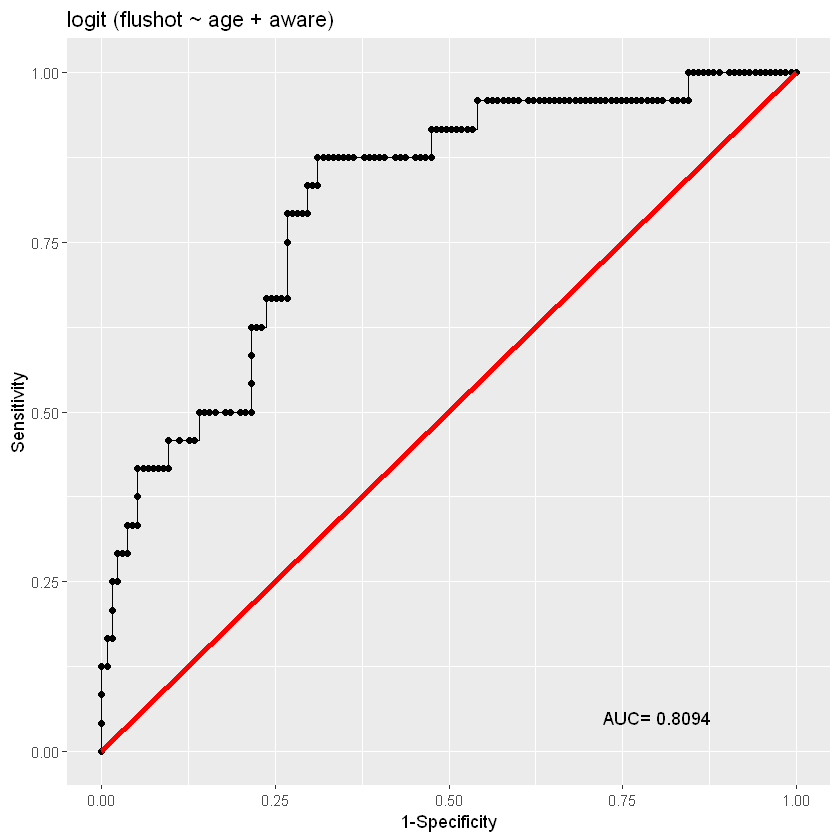

In [18]:
rocplot(log_model2)

In [19]:
tab_01=table(data$flushot,log_model2$fitted.values>0.1)
tab_015=table(data$flushot,log_model2$fitted.values>0.15)
tab_02=table(data$flushot,log_model2$fitted.values>0.2)

In [20]:
tab_01
tab_015
tab_02

   
    FALSE TRUE
  0    77   58
  1     3   21

   
    FALSE TRUE
  0    95   40
  1     4   20

   
    FALSE TRUE
  0   107   28
  1    12   12

In [21]:
res01=c(민감도=tab_01[2,2]/sum(tab_01[2,]),
        특이도=tab_01[1,1]/sum(tab_01[1,]),
        에러율=(tab_01[1,2]+tab_01[2,1])/sum(tab_01))

In [22]:
res015=c(민감도=tab_015[2,2]/sum(tab_015[2,]),
        특이도=tab_015[1,1]/sum(tab_015[1,]),
        에러율=(tab_015[1,2]+tab_015[2,1])/sum(tab_015))

In [23]:
res02=c(민감도=tab_02[2,2]/sum(tab_02[2,]),
        특이도=tab_02[1,1]/sum(tab_02[1,]),
        에러율=(tab_02[1,2]+tab_02[2,1])/sum(tab_02))

In [24]:
res01
res015
res02

민감도    특이도    에러율 
0.8750000 0.5703704 0.3836478

민감도    특이도    에러율 
0.8333333 0.7037037 0.2767296

민감도    특이도    에러율 
0.5000000 0.7925926 0.2515723